In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx', na_values=['0'])

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop('ID', axis=1, inplace=True)

In [5]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.drop(columns=['CollegeID','CollegeCityID','CollegeCityTier'],axis=1,inplace=True)

In [7]:
df.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64
ComputerScience                   int64


In [8]:
df.replace(to_replace=[-1, 'NaN'], value=np.nan, inplace=True)

### Basic Stats

In [9]:
df.describe()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3752.000000,3130.000000,1144.000000,902.000000,235.000000,161.000000,374.000000,42.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,1.925713,71.486171,2012.105803,501.649075,501.598799,513.378189,0.609525,451.301278,335.644231,405.636364,406.876596,433.037267,350.173797,349.666667,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,0.262270,8.167338,31.857271,104.940021,86.783297,122.302332,0.273159,97.158687,81.194840,89.960805,84.894993,98.515537,75.661864,79.784670,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,1.000000,6.450000,0.000000,180.000000,195.000000,120.000000,0.002750,105.000000,133.000000,130.000000,180.000000,206.000000,153.000000,166.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,2.000000,66.407500,2012.000000,425.000000,445.000000,430.000000,0.376060,385.000000,292.000000,346.000000,362.000000,366.000000,287.500000,292.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,2.000000,71.720000,2013.000000,500.000000,505.000000,515.000000,0.649390,455.000000,333.000000,407.000000,407.000000,433.000000,356.000000,348.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,2.000000,76.327500,2014.000000,570.000000,565.000000,595.000000,0.842248,515.000000,388.000000,469.000000,446.000000,500.000000,393.000000,388.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,2.000000,99.930000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


###  Null value Count

In [10]:
df.isnull().sum()

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                   350
12graduation                0
12percentage                0
12board                   359
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to

### Quantile Range

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Salary                   190000.000000
10percentage                 13.990000
12graduation                  2.000000
12percentage                 16.600000
CollegeTier                   0.000000
collegeGPA                    9.920000
GraduationYear                2.000000
English                     145.000000
Logical                     120.000000
Quant                       165.000000
Domain                        0.466189
ComputerProgramming         130.000000
ElectronicsAndSemicon        96.000000
ComputerScience             123.000000
MechanicalEngg               84.000000
ElectricalEngg              134.000000
TelecomEngg                 105.500000
CivilEngg                    96.000000
conscientiousness             1.416225
agreeableness                 1.099900
extraversion                  1.276800
nueroticism                   1.394400
openess_to_experience         1.171600
dtype: float64


<AxesSubplot:xlabel='Salary', ylabel='Degree'>

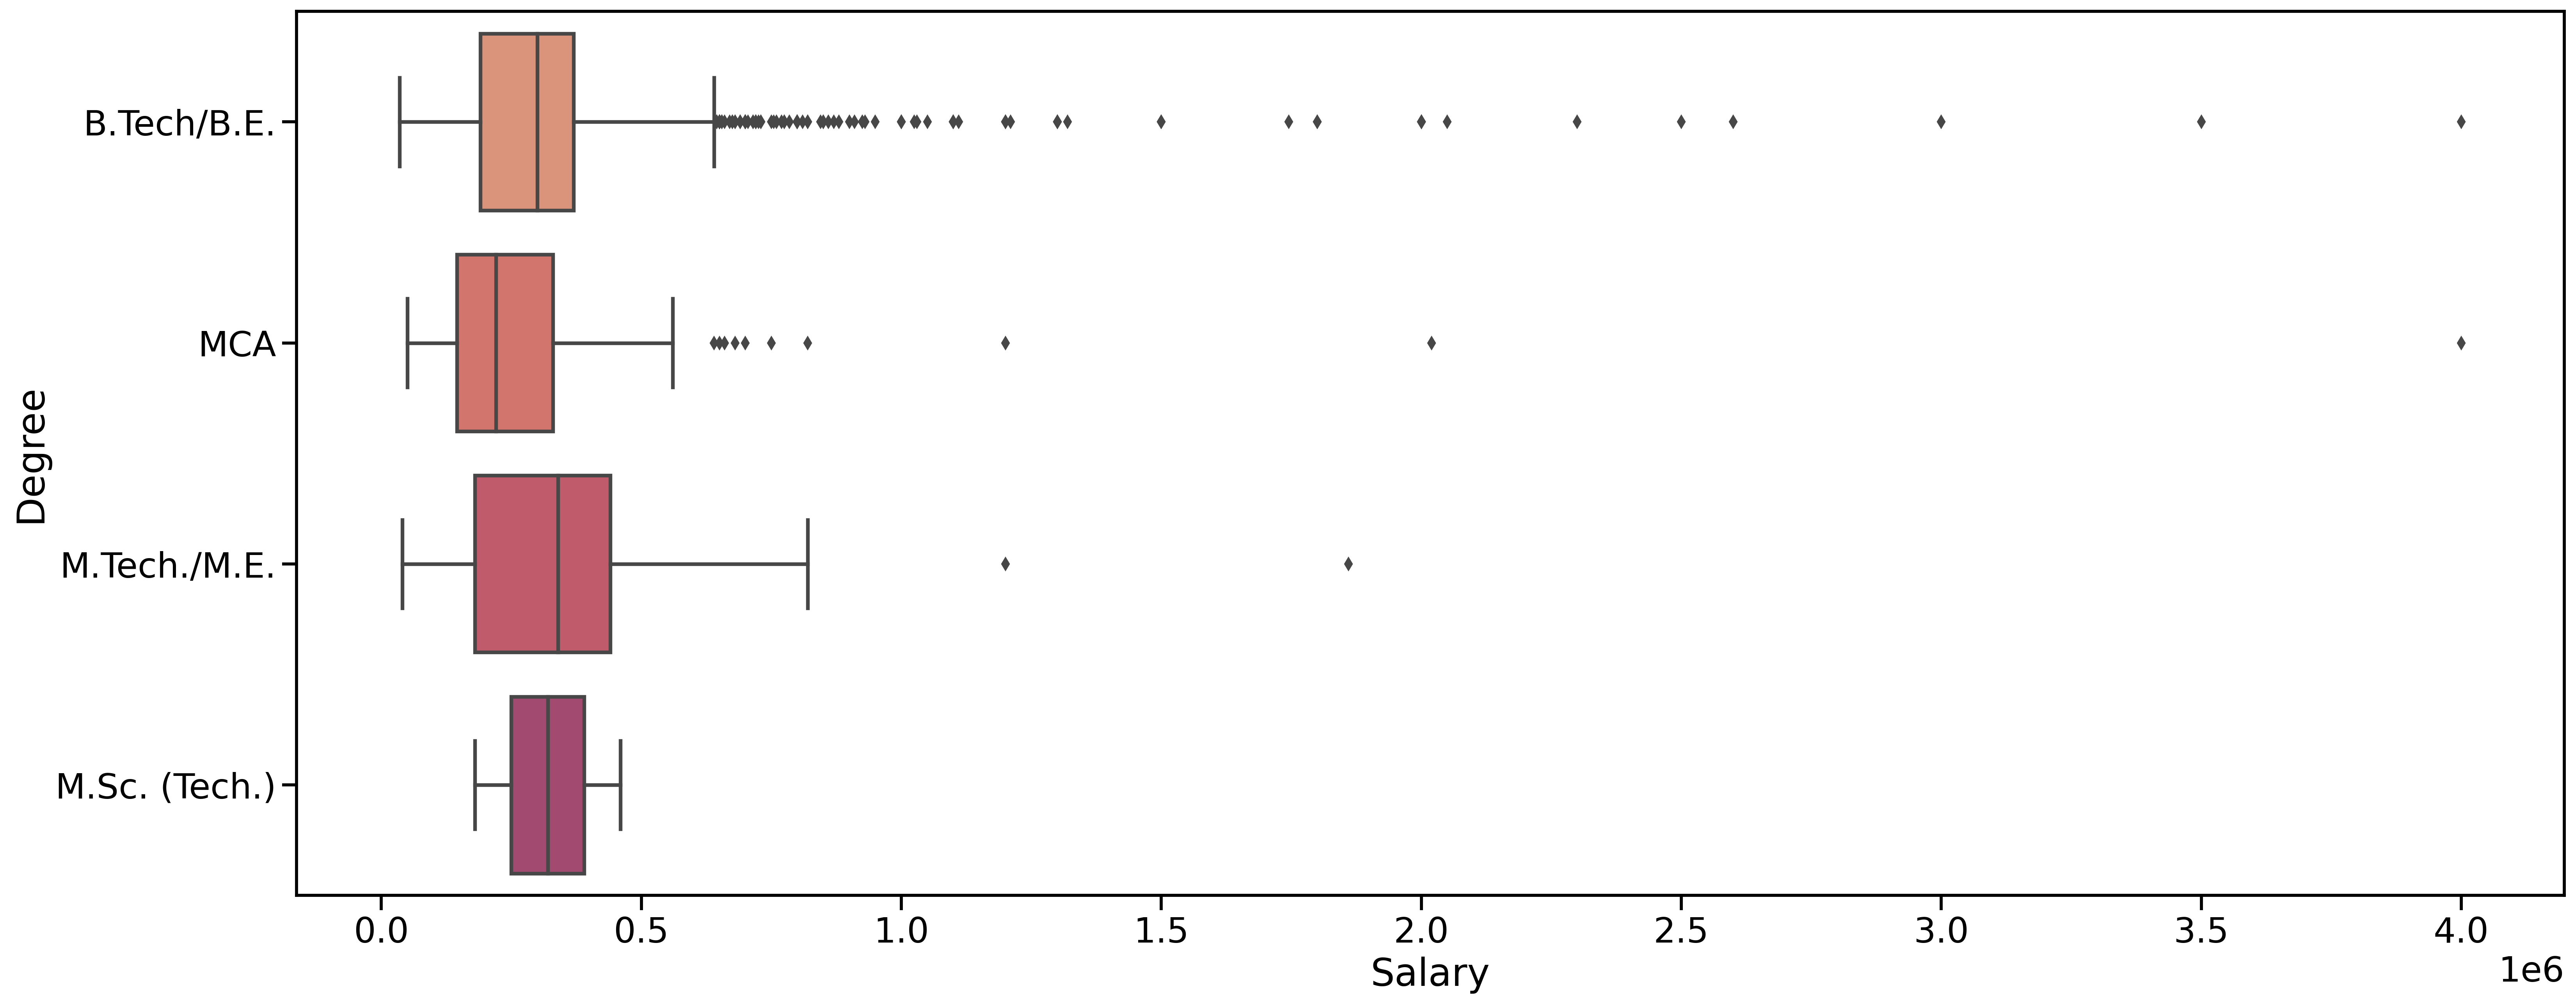

In [13]:
sns.set_palette("flare")
sns.set_context(context='talk', font_scale=1.3)
plt.figure(figsize=(25,10), dpi=300)
sns.boxplot(x='Salary', y='Degree',data=df)
#plt.yticks(rotation=25)

### Removing Outliers

In [15]:
dfNoOutliers = df[(np.abs(df.Salary-df.Salary.mean()) <= (3*df.Salary.std()))] #removing outliers > 3 SD

### Salary Vs Degree 

<AxesSubplot:xlabel='Salary', ylabel='Degree'>

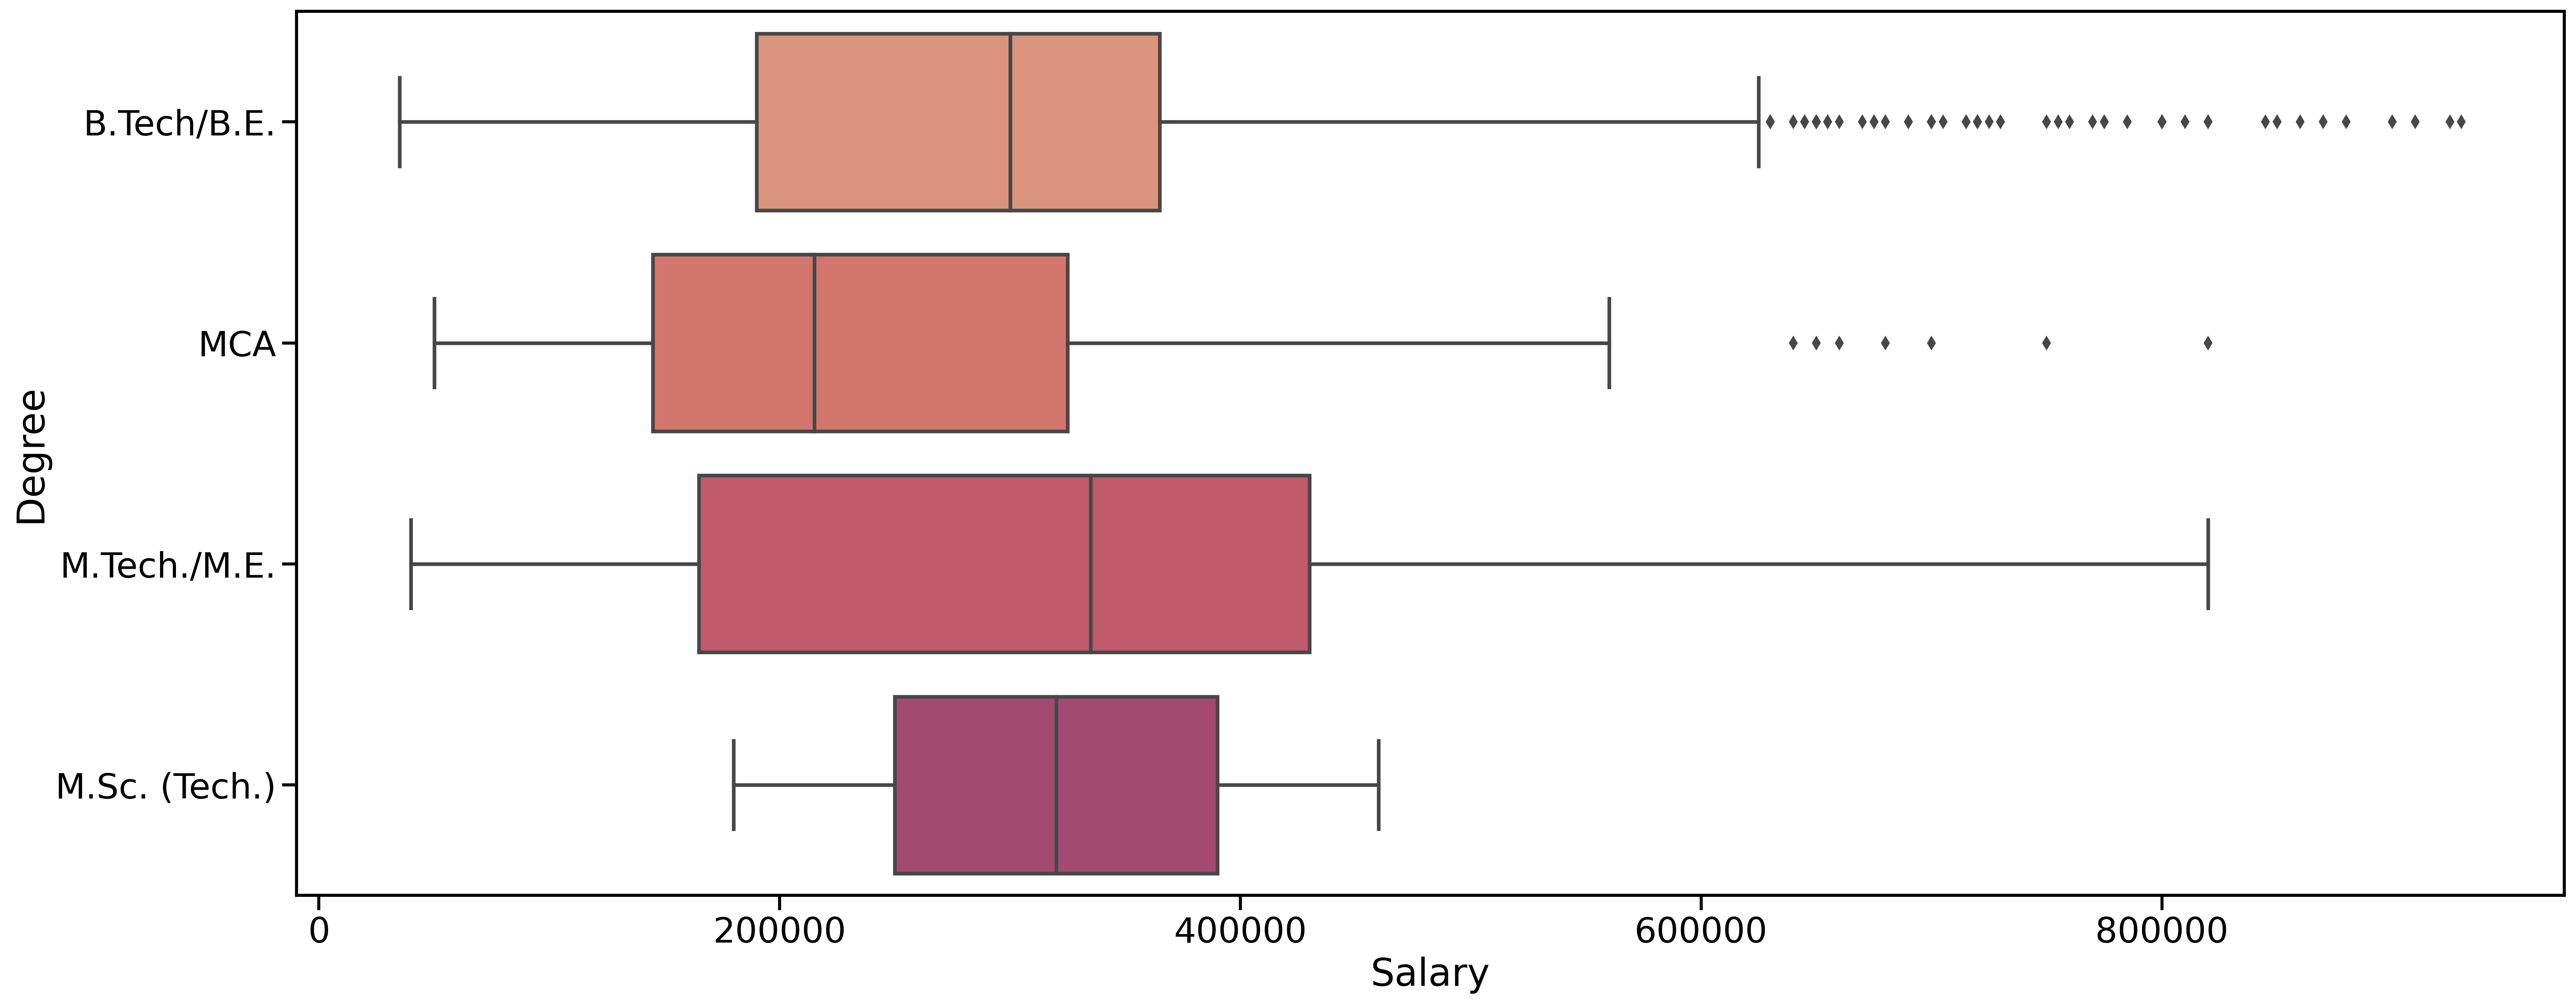

In [16]:
sns.set_palette("flare")
sns.set_context(context='talk', font_scale=1.3)
plt.figure(figsize=(25,10), dpi=300)
sns.boxplot(x='Salary', y='Degree',data=dfNoOutliers)
#plt.yticks(rotation=25)

### Gender Demographics

<AxesSubplot:>

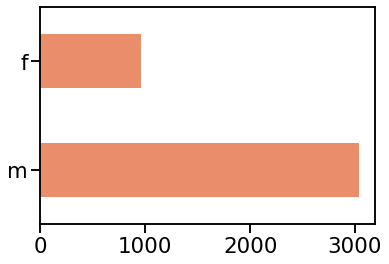

In [20]:
df.Gender.value_counts().plot.barh()

In [18]:
dfOutliers = df[~((np.abs(df.Salary-df.Salary.mean()) <= (3*df.Salary.std())))]

### Salary Distribution 

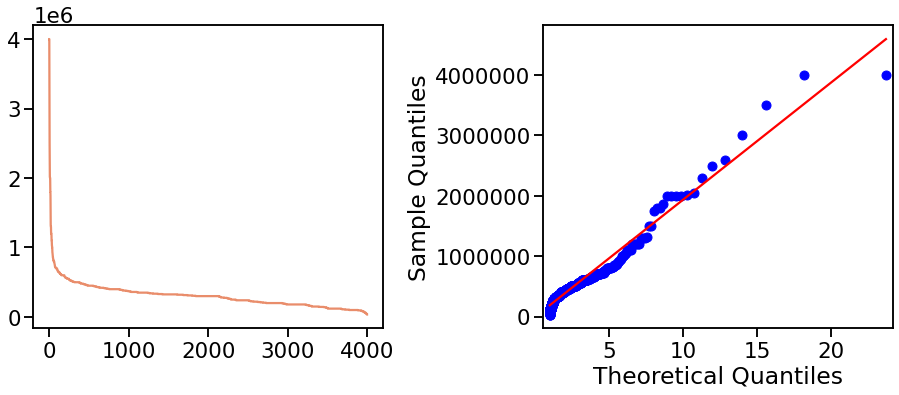

In [19]:
import statsmodels.api as sm
from scipy.stats import pareto
b = 2.62

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,6))
fig.subplots_adjust(wspace=2)

sm.qqplot(df.Salary, dist=pareto(b), line='r', ax=ax[1])

sns.lineplot(data=sorted(df.Salary, reverse=True), ax=ax[0])

plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()

##### <center>Salary losely follows pareto distribution</center>

### Specialization

([<matplotlib.axis.XTick at 0x202db4a7670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

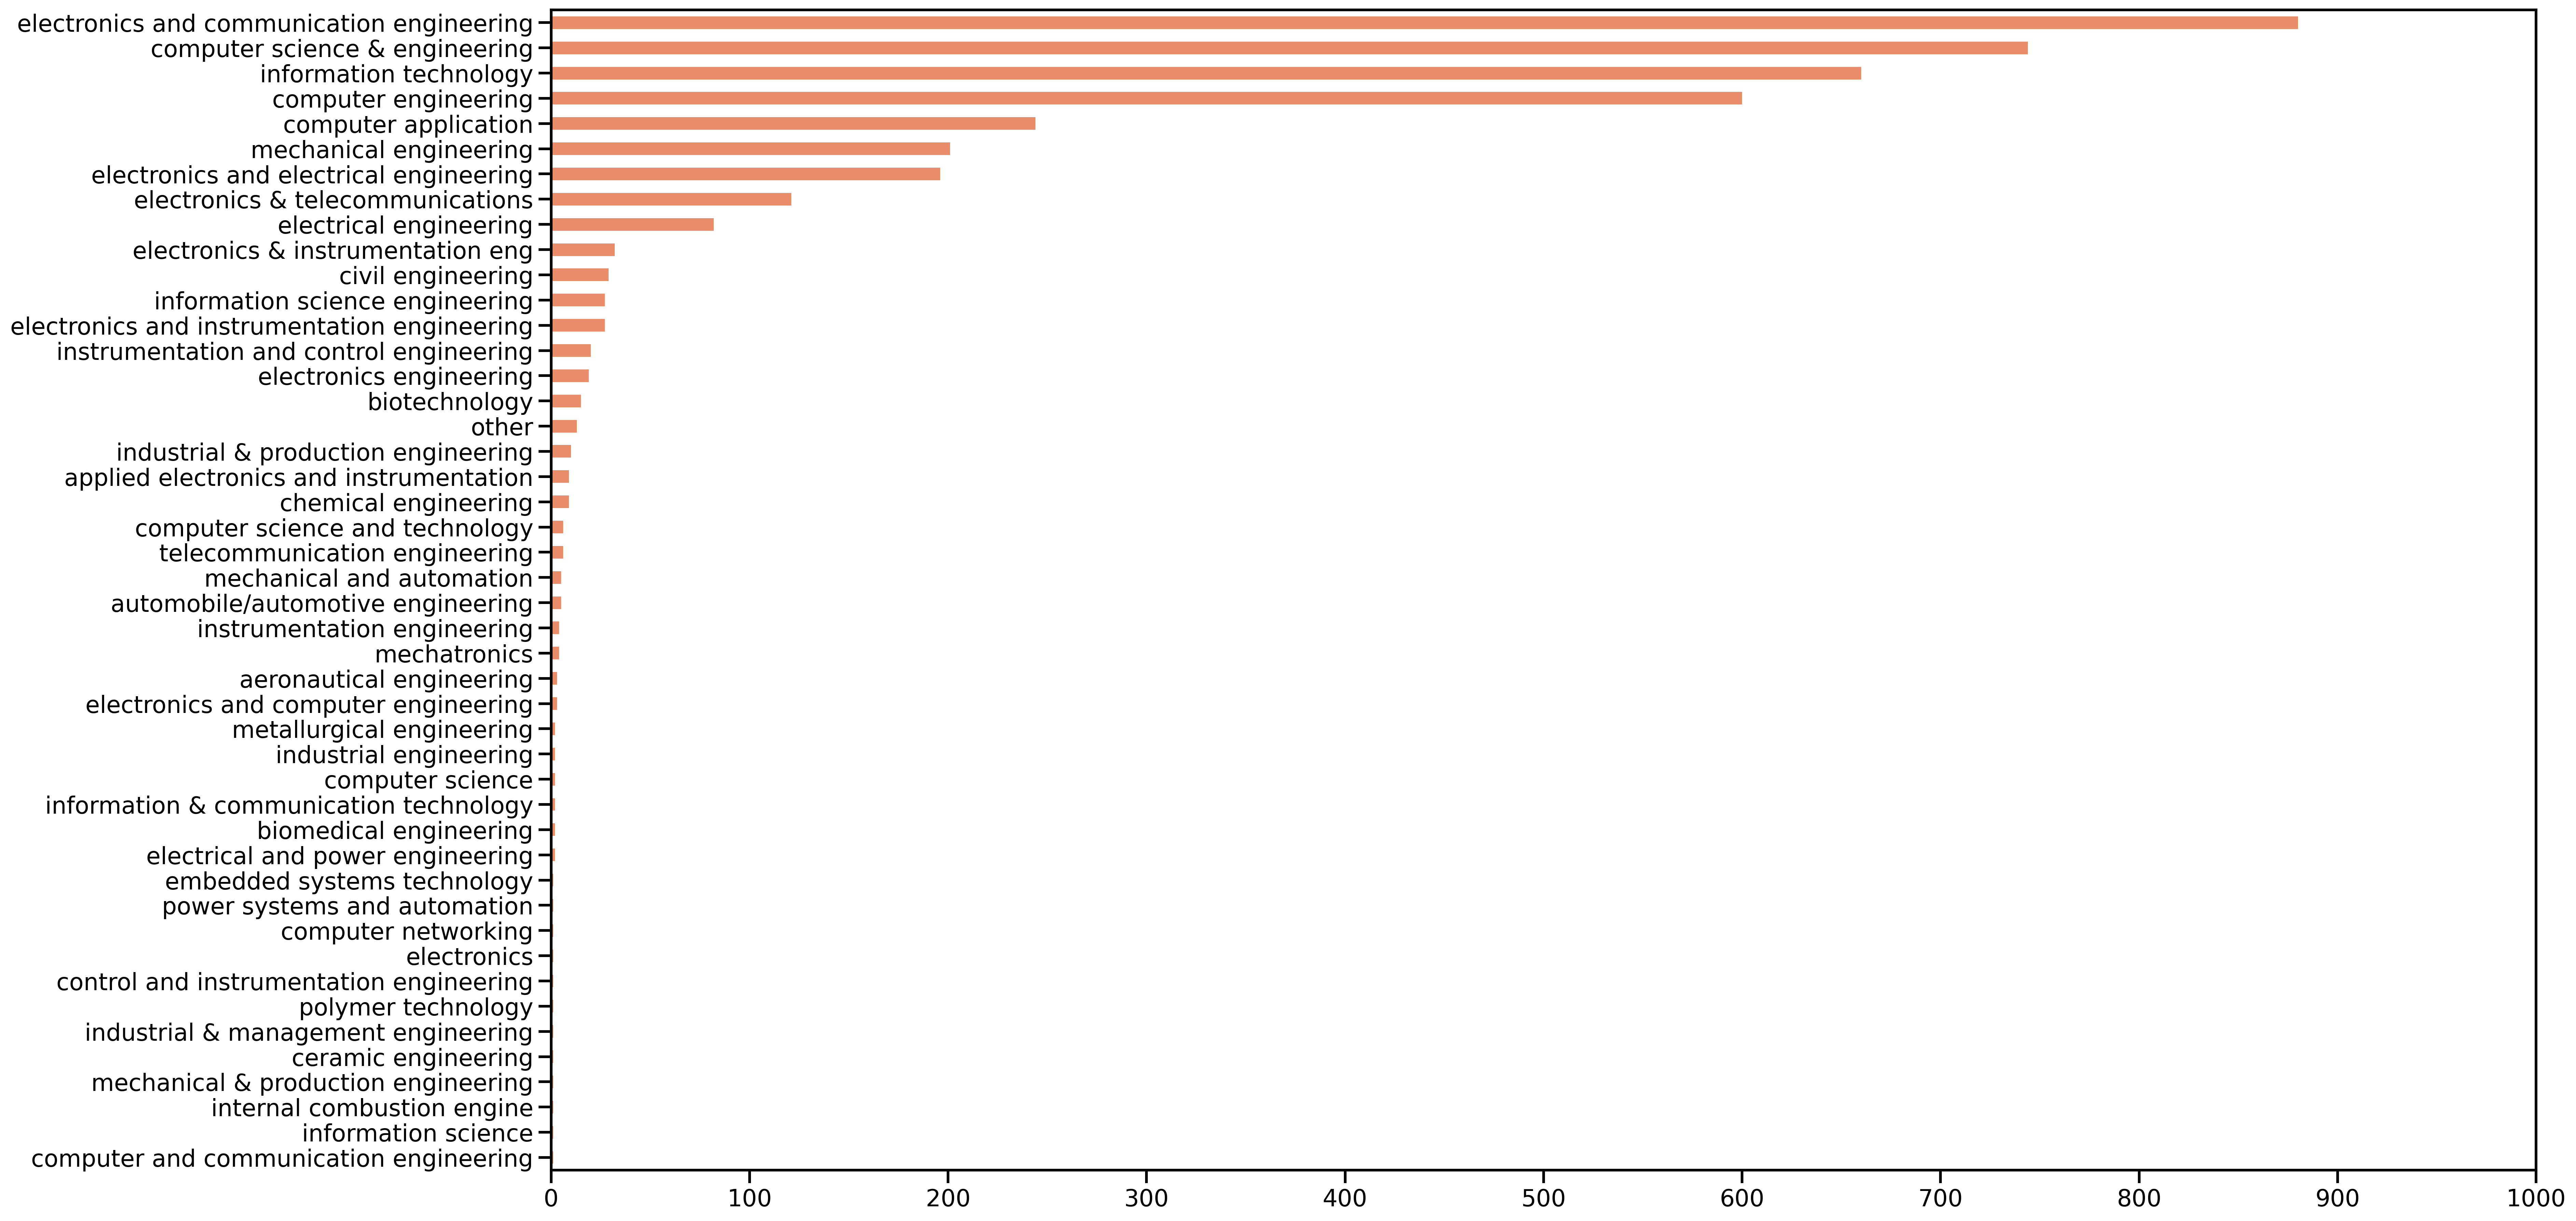

In [20]:
sns.set_context(context='talk', font_scale=1)
plt.figure(figsize=(25,15), dpi=300)
df['Specialization'].value_counts(ascending=True).plot.barh()
plt.xticks(np.arange(0, 1001, step=100)) 

#### <center>Maximum are from Electronics & Computer Engg </center>

<AxesSubplot:xlabel='collegeGPA', ylabel='Count'>

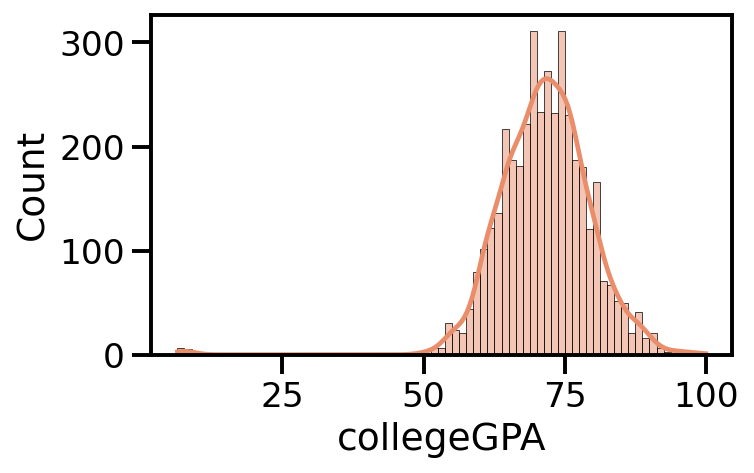

In [21]:
sns.set_palette("flare")
plt.figure(figsize=(5,3), dpi=150)
sns.histplot(data=df.collegeGPA, kde=True)

In [24]:
dfNoOutliers.loc[:,('averageAmcat')]=(dfNoOutliers[['Logical','Quant','English']]).sum(axis=1)/3
dfNoOutliers.loc[:,('meanGpa')]=dfNoOutliers[['10percentage','12percentage','collegeGPA']].sum(axis=1)/3

### Regression plot between Amcat score & Salary

<AxesSubplot:xlabel='Salary', ylabel='averageAmcat'>

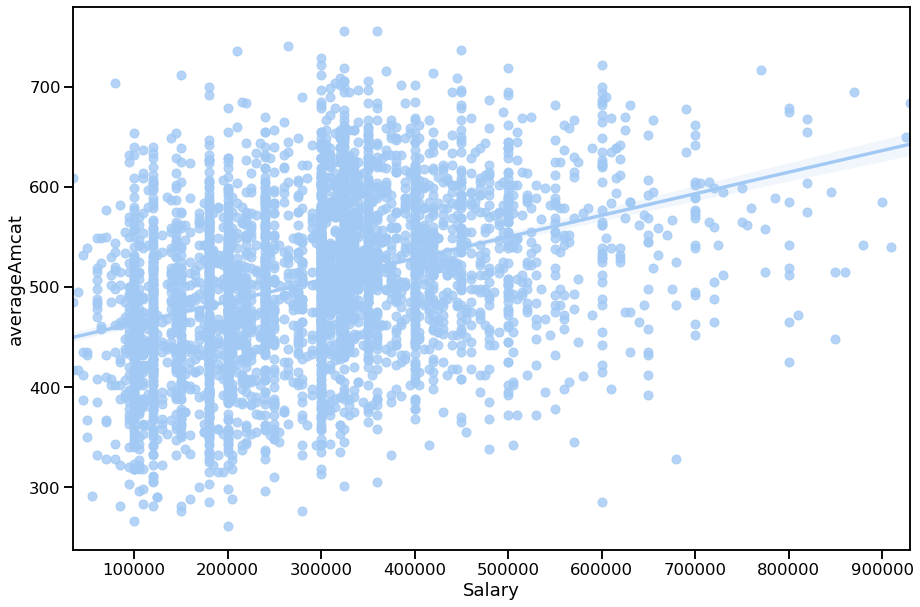

In [25]:
sns.set_palette("pastel")
sns.set_context(context='talk')
plt.figure(figsize=(15,10))
sns.regplot(x=dfNoOutliers["Salary"], y=dfNoOutliers["averageAmcat"], data=dfNoOutliers)
# plt.xticks(rotation='45')

##### <center>Shows a positive correlation </center>

### KDE plot between Amcat score & Salary

([<matplotlib.axis.XTick at 0x202dcc06bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

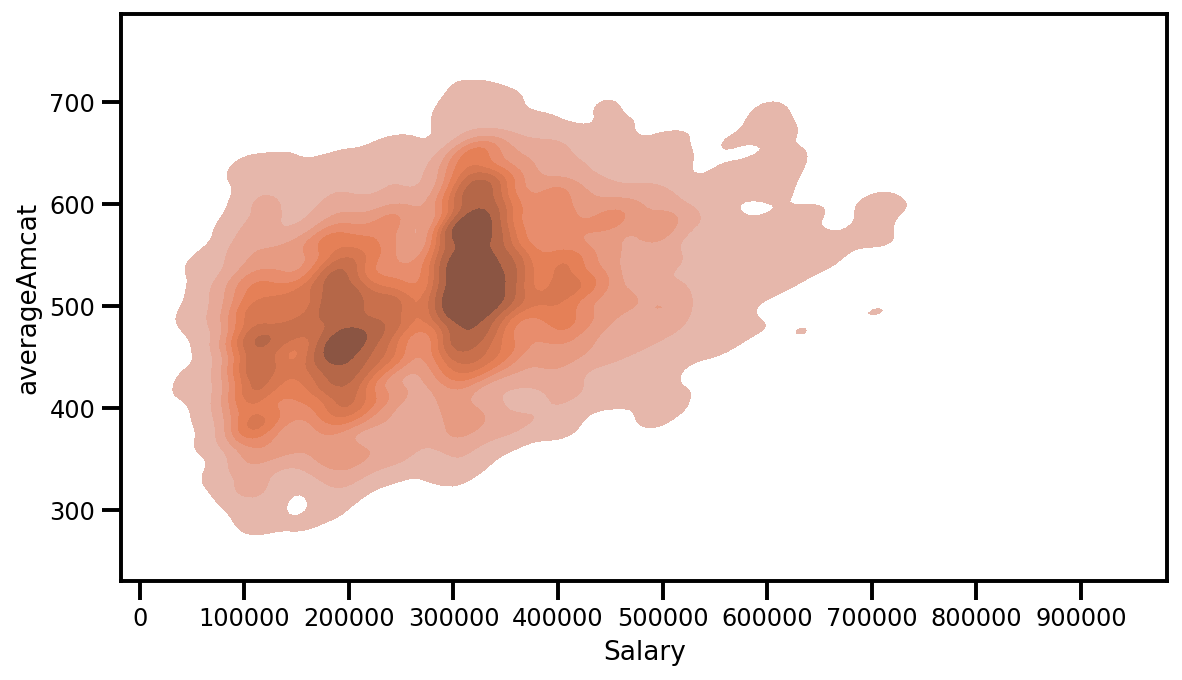

In [26]:
sns.set_palette("flare")
sns.set_context(context='talk', font_scale=.7)
plt.figure(figsize=(9,5),dpi=150)
sns.kdeplot(x=dfNoOutliers["Salary"], y=dfNoOutliers["averageAmcat"], data=dfNoOutliers, shade=True, bw_adjust=.5)
plt.xticks(np.arange(0, 1000000, step=100000)) 

##### <center>Most of the people have salarys between 3L-4L</center>

### Personality score vs Salary

In [33]:
personalityDf = dfNoOutliers[['Salary', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']]

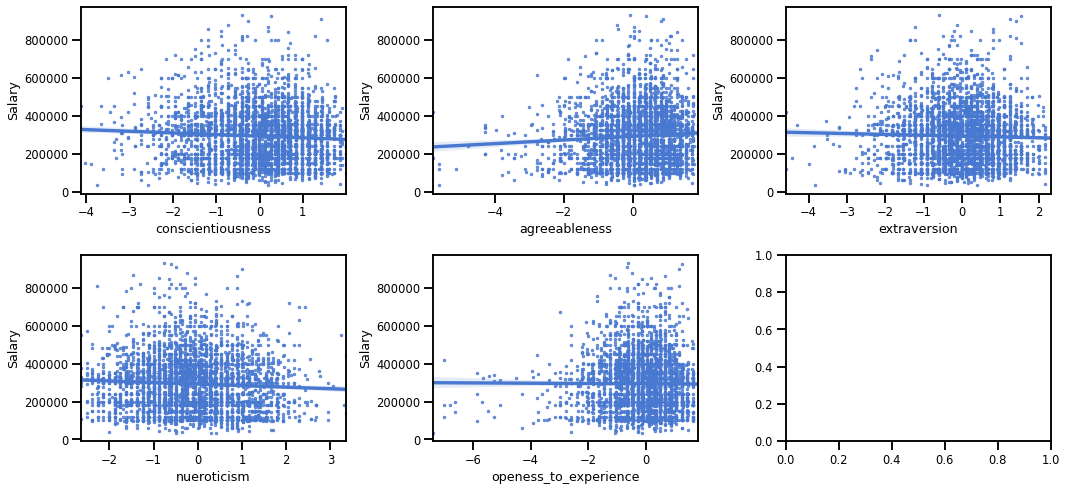

In [34]:
sns.set_palette("muted")
fig , ax = plt.subplots(ncols=3,nrows=2, figsize=(15,7))
sns.regplot(x='conscientiousness', y='Salary',data=personalityDf, ax=ax[0,0],scatter_kws={'s': 6})
sns.regplot(x='agreeableness', y='Salary',data=personalityDf, ax=ax[0,1],scatter_kws={'s': 6})
sns.regplot(x='extraversion', y='Salary',data=personalityDf, ax=ax[0,2],scatter_kws={'s': 6})
sns.regplot(x='nueroticism', y='Salary',data=personalityDf, ax=ax[1,0],scatter_kws={'s': 6})
sns.regplot(x='openess_to_experience', y='Salary',data=personalityDf, ax=ax[1,1],scatter_kws={'s': 6})
plt.tight_layout()

##### <center>Shows no corrrelation, Below are some references on effectiveness of personality tests</center>

```{cite:ts}
Gurven M, von Rueden C, Massenkoff M, Kaplan H, Lero Vie M. How universal is the Big Five? Testing the five-factor model of personality variation among forager-farmers in the Bolivian Amazon. J Pers Soc Psychol. 2013;104(2):354-370. doi:10.1037/a0030841
```
https://www.forbes.com/sites/dinagachman/2012/11/16/workplace-personality-tests-total-waste/?sh=2769f323617a

### Job count by City

In [36]:
df['JobCity'] = df['JobCity'].str.lower()

<AxesSubplot:>

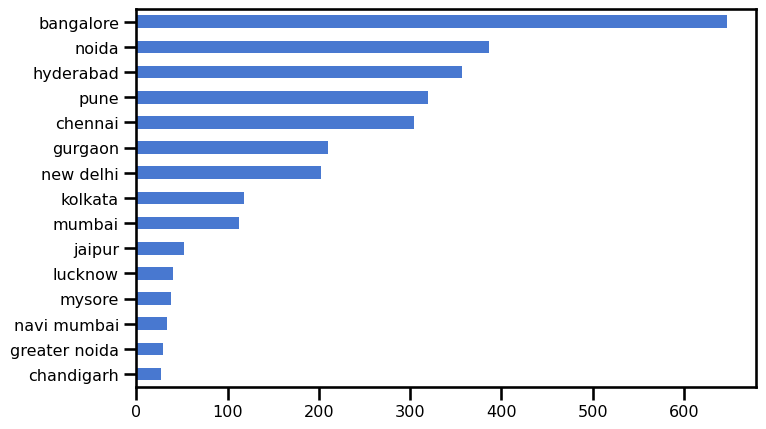

In [37]:
plt.figure(figsize= (8,5), dpi=100)
df['JobCity'].value_counts().head(15).sort_values().plot.barh()

<Figure size 700x700 with 0 Axes>

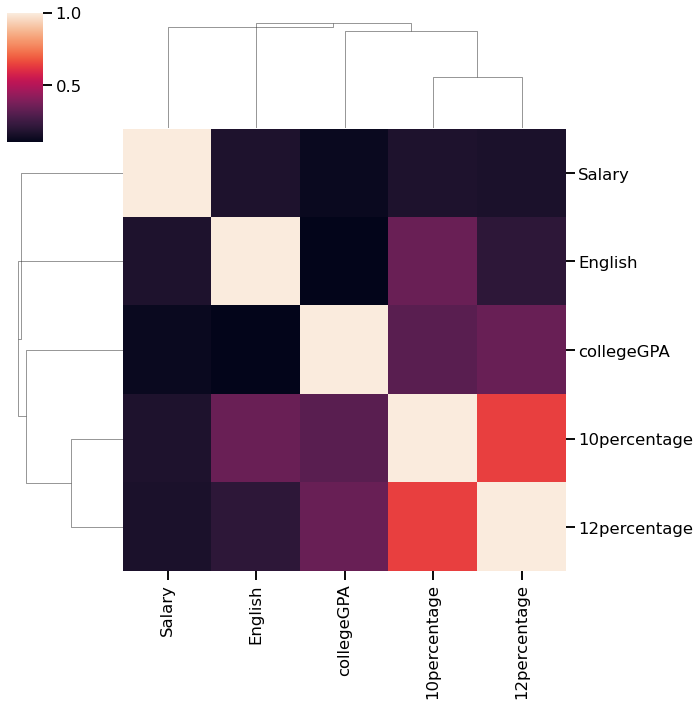

In [56]:
plt.figure(figsize= (7,7), dpi=100)
sns.clustermap(data=df[['Salary','10percentage', '12percentage', 'collegeGPA',
        'English']].corr(), method='median')

### Demographics of Top Earners

#### College tier

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

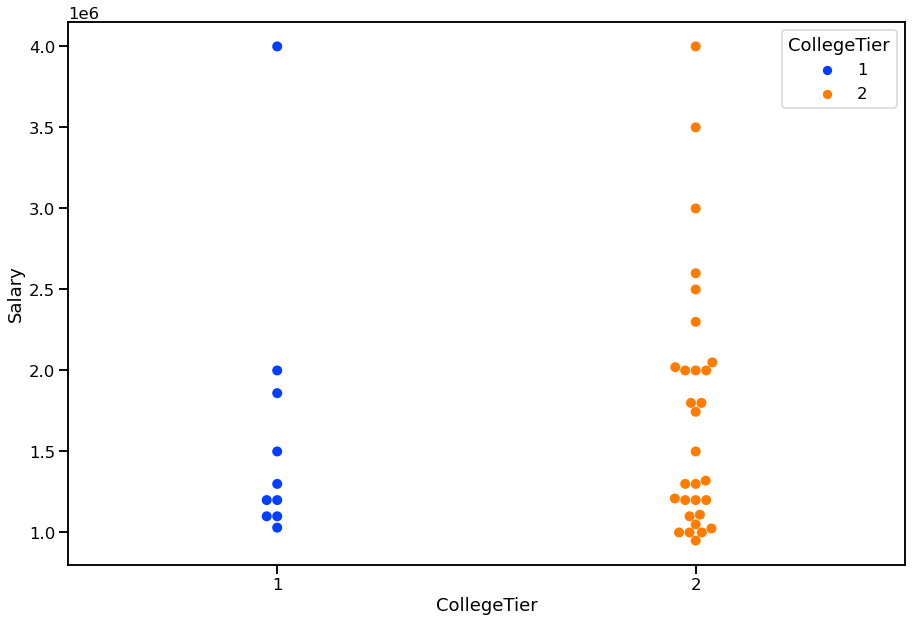

In [39]:
sns.set_palette("bright")
sns.set_context(context='talk')
plt.figure(figsize=(15,10))
sns.swarmplot(y=dfOutliers["Salary"], x=dfOutliers['CollegeTier'], size=10, hue='CollegeTier',data=dfOutliers)

### Gender

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

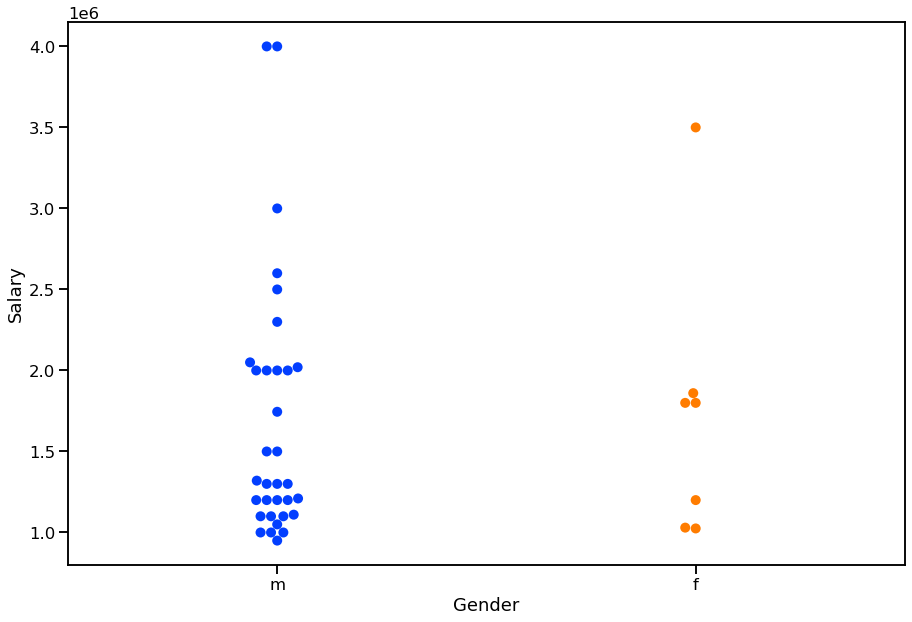

In [24]:
sns.set_palette("bright")
sns.set_context(context='talk')
plt.figure(figsize=(15,10))
sns.swarmplot(y=dfOutliers["Salary"], x=dfOutliers['Gender'], size=10,data=dfOutliers)

## Chi-Square test

## Chi2 Test of Independence

Lets make a bold Claim that some two variables Avg Gpa & Salary are dependent.

Step - 1:  
i.e. Alternate Hypothesis: $$ H_1: They \ are \ Dependent $$
and Null Hypothesis: $$ H_0: They \ are \ Independent $$

Step - 2:  
* Collect the sample of size n
* Compute the sample frequencies

Step - 3: Compute $ \chi^2 $ test statistic  
Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.
* Have a look at Observed Frequencies (in the sample)
* Compute the Expected Frequencies (under null hyp assumption) $$ Expected \ Value = \frac{row \ total * col \ total}{grand \ total}$$
Now, test statistic can be computed using below mentioned formula: $$ \chi^2 = \Sigma \frac{(o-e)^2}{e} $$

Step - 4: Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

Step - 5: Apply decision rule  
* Chi Square Test $$ if \ \chi^2 > \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$
* p-value Test $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [41]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [42]:
observed = pd.crosstab(df.Salary,df.collegeGPA, margins=True)

In [43]:
chi2_contingency(observed)

(228922.36532610035,
 0.0014722204553581709,
 226914,
 array([[7.50375188e-04, 7.50375188e-04, 7.50375188e-04, ...,
         7.50375188e-04, 7.50375188e-04, 3.00000000e+00],
        [5.00250125e-04, 5.00250125e-04, 5.00250125e-04, ...,
         5.00250125e-04, 5.00250125e-04, 2.00000000e+00],
        [1.00050025e-03, 1.00050025e-03, 1.00050025e-03, ...,
         1.00050025e-03, 1.00050025e-03, 4.00000000e+00],
        ...,
        [2.50125063e-04, 2.50125063e-04, 2.50125063e-04, ...,
         2.50125063e-04, 2.50125063e-04, 1.00000000e+00],
        [5.00250125e-04, 5.00250125e-04, 5.00250125e-04, ...,
         5.00250125e-04, 5.00250125e-04, 2.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 3.99800000e+03]]))

In [44]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df1 = chi2_contingency(observed)[2]

In [45]:
confidence_level = 0.95

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df1)

chi2_critical

228023.2204155081

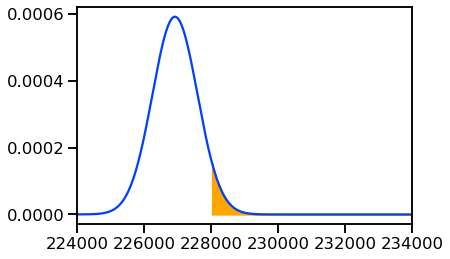

In [46]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 224000
x_max = 234000

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 1000)
y = chi2.pdf(x, df1)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df1)
plt.fill_between(x1, y1, color='orange')

In [47]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [48]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis
